# Simulation from bifurcation diagram, different scale ($\beta_1/\beta_2$) options
Type II, $x_{max} = 5$, $A = 0.4$, $\alpha_2(x) = 0.95$ constant, $\eta_1 = 0.2, \eta_2 = 0.5$, $T_x = 0.01$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
final_fig_path = "../../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, '../Functions')

from equilibria_funs import initiate_g_first_x, get_equilibrium
import equilibria_funs as eq
import sim_graph_funs as sim
from group_w_pop_funs import update_params, get_initial_points
from sim_graph_funs import N1lab, N2lab, Plab, mean_x_lab, Tlab, make_traj_plots, get_traj_plot_input
import bif_diagram_funs as bif
from local_stability_funs import fun_Jac, classify_stability
from equilibria_funs import find_mangel_clark
bif_sim_fig_path = final_fig_path + "/BifurcationSimulations/"

In [50]:
H = 1
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

fn_lab_list = ['meanx', 'preys', 'g2', 'g3']

# Type II, Scale = 4

In [4]:
params = update_params("scale", 4, params_base)
initial_points = get_initial_points(3,**params)
initialstate = [.3,.7,*initiate_g_first_x(3,params["x_max"])]
initial_points = np.vstack((initial_points,initialstate))

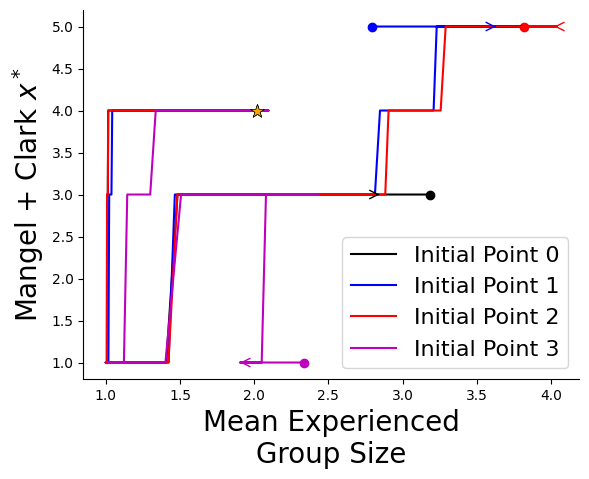

In [5]:
vectorized_find_mangel_clark = np.vectorize(find_mangel_clark)

list_traj_dics = get_traj_plot_input(params, t_f = 1000, initial_points=initial_points)

fig, ax = plt.subplots(1,1)

start_inds = [70,50,50,50]
for i, traj_dic in enumerate(list_traj_dics):
    horizontal_var = traj_dic['mean_x']
    x_mangel_clark = vectorized_find_mangel_clark(traj_dic['N1'], traj_dic['N2'], **params)
    traj_dic['x_MC'] = x_mangel_clark
    ax.scatter(horizontal_var[0], x_mangel_clark[0], marker = 'o', color = sim.colors_x[i])
    sim.plot_with_arrow(ax, horizontal_var, x_mangel_clark, i=i, label = f'Initial Point {i}', start_ind = start_inds[i])
    #ax.plot(traj_dic['N1'], x_mangel_clark, label = f'Initial Point {i}', c = sim.colors_x[i])

sim.format_ax(ax = ax, xlab = mean_x_lab, ylab = "Mangel + Clark " + r'$x^*$', if_legend = True)

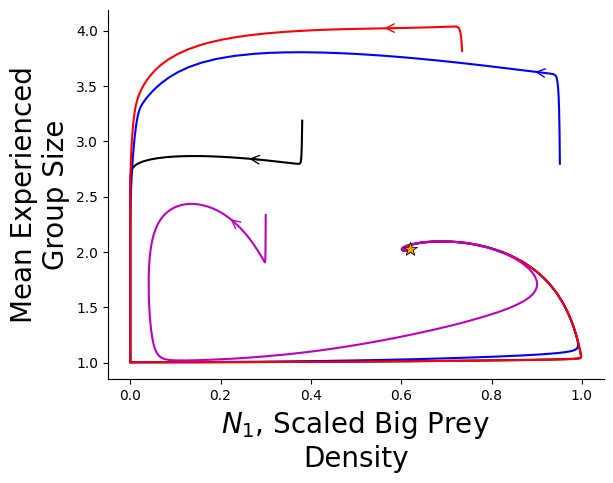

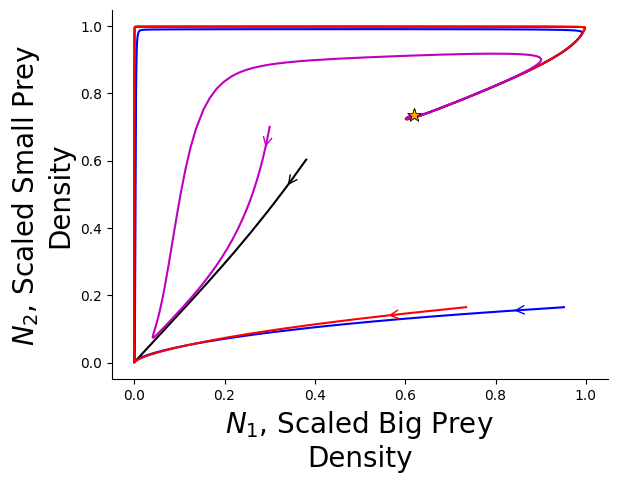

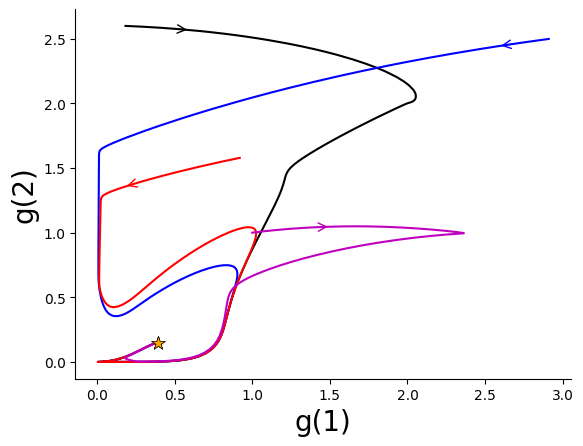

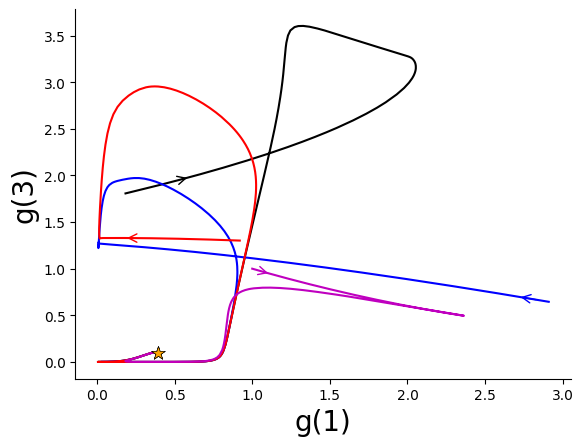

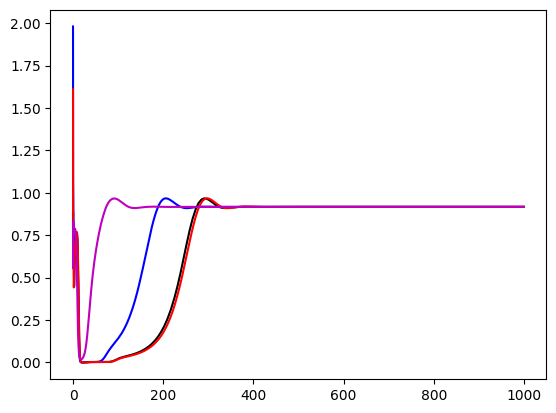

In [6]:
start_inds = [[70,50,50,80], #black trajectory
              [65,55,50,70], #blue trajectory
              [10,3,10,30], # red trajectory
              [10,2,10,20]] # magenta trajectory

fig1, figN, fig_g2, fig_g3, fig_var = make_traj_plots(
    params, t_f =1000, start_inds = start_inds, grp_size2 = 3,
initial_points = initial_points
)

In [7]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_4.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

# Type 2, Scale = 6

In [8]:
params_base

{'η1': 0.2,
 'η2': 0.6,
 'A1': 0.6,
 'A2': 0.5,
 'β1': 8,
 'β2': 1,
 'H1a': 0,
 'H1b': 1,
 'H2a': 0,
 'H2b': 1,
 'α1_of_1': 0.05,
 'α2_of_1': 0.95,
 's1': 2,
 's2': 2,
 'α2_fun_type': 'constant',
 'x_max': 5,
 'd': 10,
 'Tx': 0.01,
 'pop_process': True}

In [9]:
params = bif.update_params("scale", 6, params_base)


In [10]:
out = get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = [1,1,1,0,0])
equilibrium = out.x
print(equilibrium)


perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = get_initial_points(3,**params, p_upper = 2)
initial_points = np.vstack((initial_points,perturbed_pt))

[0.73592356 0.87674382 0.2126679  0.07879816 0.05821896 0.01366055
 0.00104901]


In [11]:
initial_points

array([[3.80794718e-01, 6.02671899e-01, 1.73369053e+00, 1.25350779e-02,
        2.49514560e-02, 1.96129099e-02, 1.22094568e-02],
       [9.51207163e-01, 1.64458454e-01, 2.87592783e-01, 3.95928066e-01,
        1.62650679e-01, 6.96303826e-02, 2.97515302e-02],
       [7.34674002e-01, 1.64434575e-01, 5.91367851e-01, 5.55160291e-01,
        6.29838937e-02, 1.29568834e-02, 1.14546960e-02],
       [7.00000000e-01, 7.00000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e-04, 1.00000000e-04]])

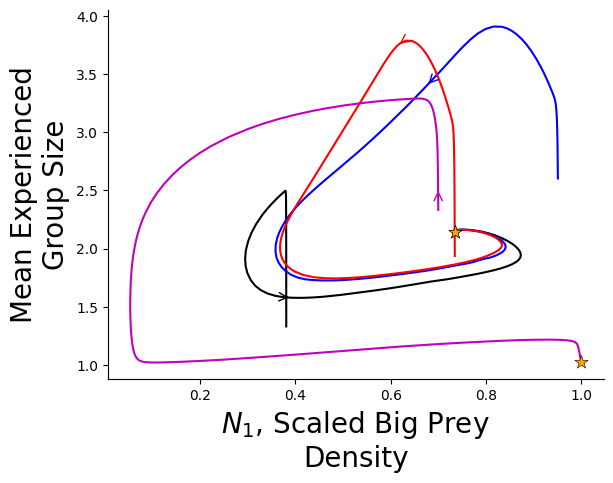

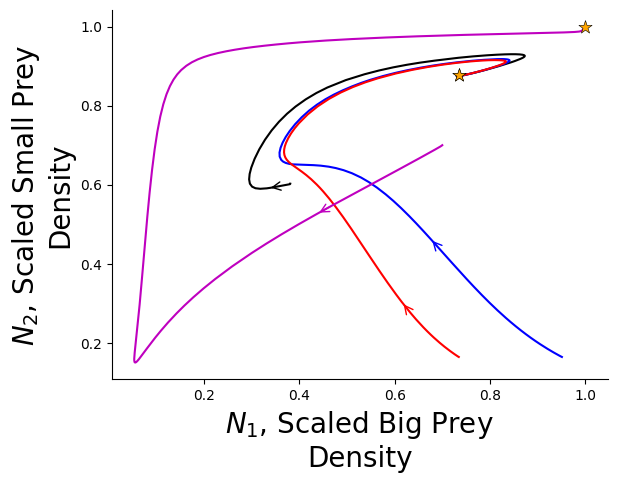

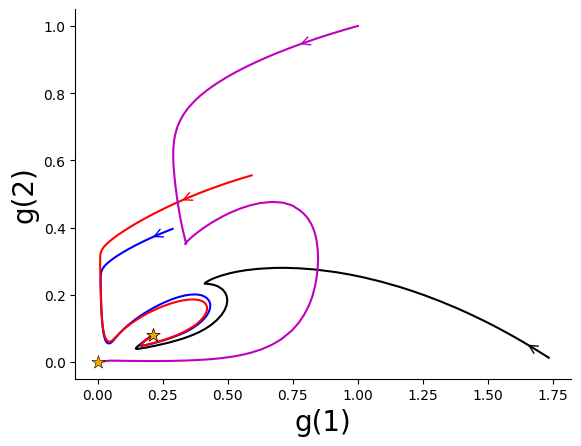

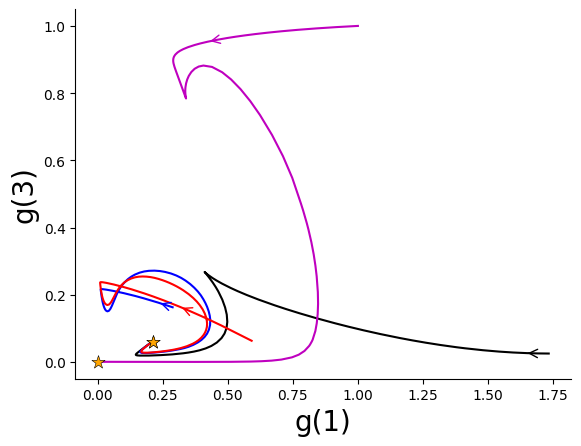

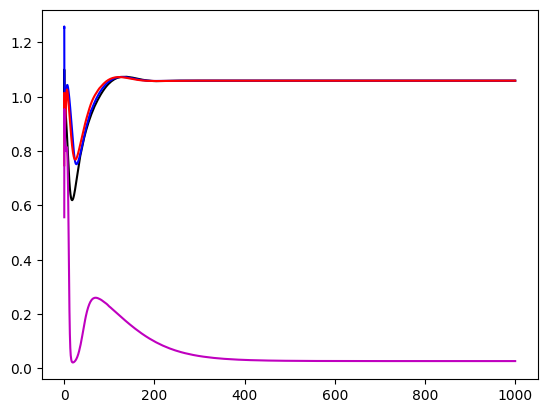

In [12]:
start_inds = [[80,50,50,40],
              [65,50,50,110],
              [10,3,10,40],
              [10,2,10,50]]

fig1, figN, fig_g2, fig_g3, _ = make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

In [13]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_6.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

# Type 2, Scale = 12

In [85]:
params = update_params("scale", 12, params_base)
start_inds = [[70,50,55,115], # plot 1; black, blue, red, magenta
              [80,55,50,102], # plot 2
              [10,3,10,75],
              [10,3,8,143]]

In [15]:
params

{'η1': 0.049999999999999996,
 'η2': 0.6,
 'A1': 0.6,
 'A2': 0.5,
 'β1': 12,
 'β2': 1,
 'H1a': 0.0,
 'H1b': 14.399999999999999,
 'H2a': 0,
 'H2b': 1,
 'α1_of_1': 0.05,
 'α2_of_1': 0.95,
 's1': 2,
 's2': 2,
 'α2_fun_type': 'constant',
 'x_max': 5,
 'd': 10,
 'Tx': 0.01,
 'pop_process': True}

In [17]:
out = get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = np.array([1,1,1,0,0]))
equilibrium = out.x
print(equilibrium)


#perturbed_pt = equilibrium + .01*#[0.4, 0.2, 1,1,1e-4,1e-4,1e-4]
perturbed_pt = bif.get_perturbations(equilibrium, 1, .1)
initial_points = bif.get_initial_points(3,**params, p_upper = 2)
initial_points = np.vstack((initial_points,perturbed_pt))

[0.67588115 0.92778671 0.13953891 0.0592777  0.04923526 0.01769267
 0.00276506]


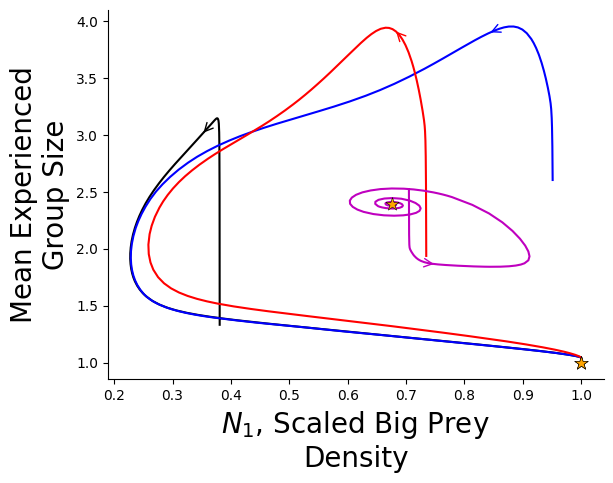

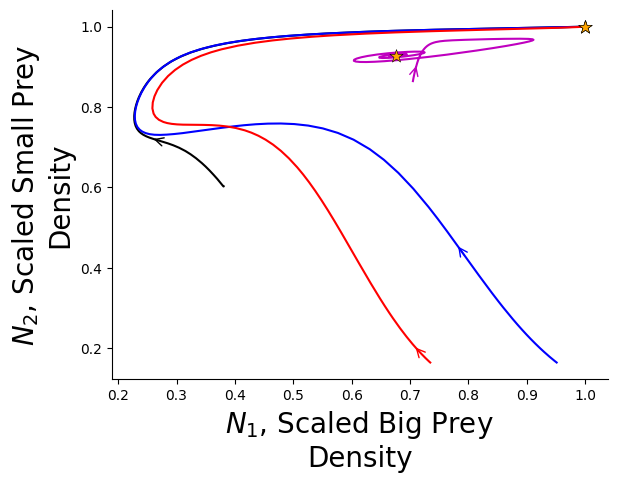

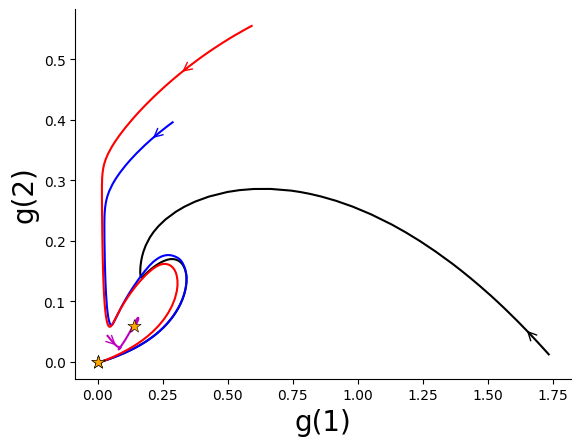

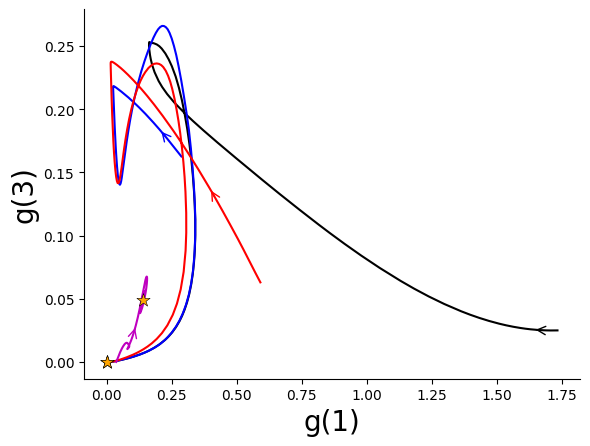

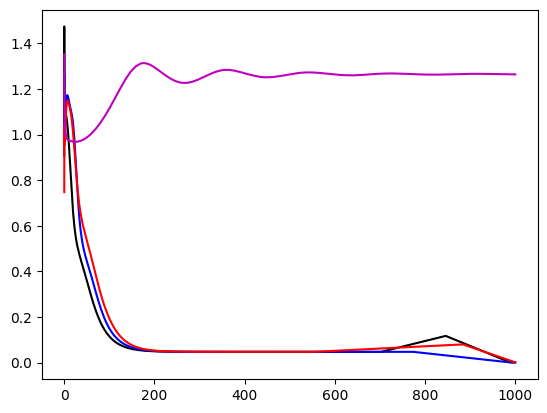

In [86]:
fig1, figN, fig_g2, fig_g3, _ = make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

eq_dict = eq.get_results_eq(out, params['x_max'], if_dict = True)
x_to_plot = [eq_dict['N1'],eq_dict['N1'],eq_dict['g'][0],eq_dict['g'][0]]
y_to_plot = [eq_dict['mean_x'], eq_dict['N2'], eq_dict['g'][1], eq_dict['g'][2]]
for fig, x, y in zip([fig1, figN, fig_g2, fig_g3], x_to_plot, y_to_plot):
    ax = fig.gca()
    ax.scatter(x,y,c='orange', edgecolors = 'k',linewidths=.4,
                   marker = "*", s = 100, zorder = 100)

In [87]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_12.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [48]:
trajectories = get_traj_plot_input(params, t_f = 1000, initial_points = initial_points)
# each trajectory in form T, N1, N2, P, g_of_x_vec, mean_x

# Type 2, Scale = 4, $\eta_2 = 0.9$

In [88]:
H = 1
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.9, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)
params = update_params(param_key = "scale", param=4, params_base=params_base)

In [89]:
start_inds = [[70,50,55,115], # plot 1; black, blue, red, magenta
              [80,55,50,102], # plot 2
              [10,3,10,75],
              [10,3,8,143]]

In [92]:

perturbed_pt = [0.4, 0.2, 1,1,1e-4,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params, p_upper = 2)
initial_points = np.vstack((initial_points,perturbed_pt))

/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Simulations/../Functions/group_w_pop_funs.py:372: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates


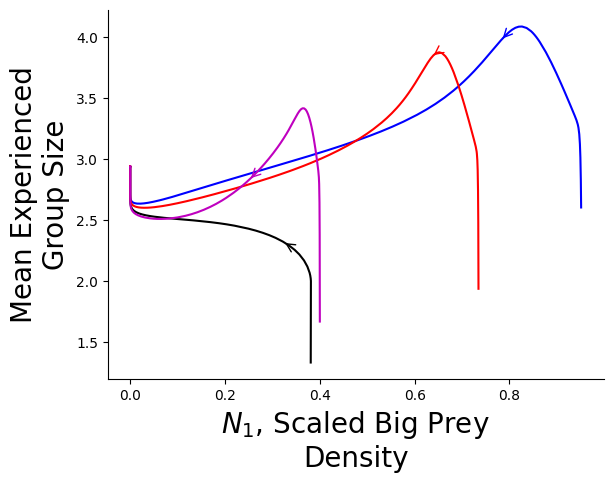

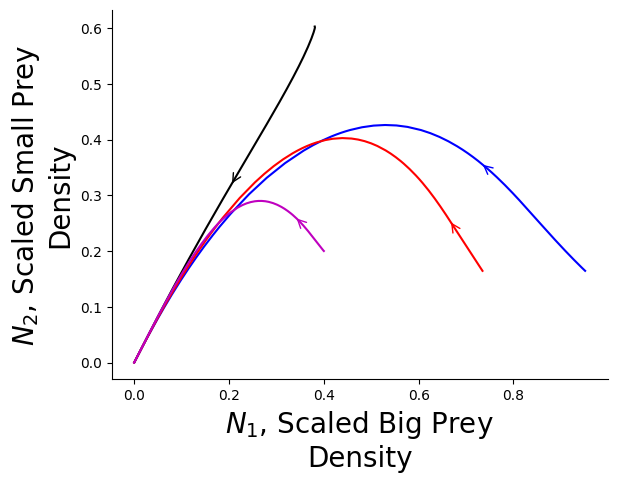

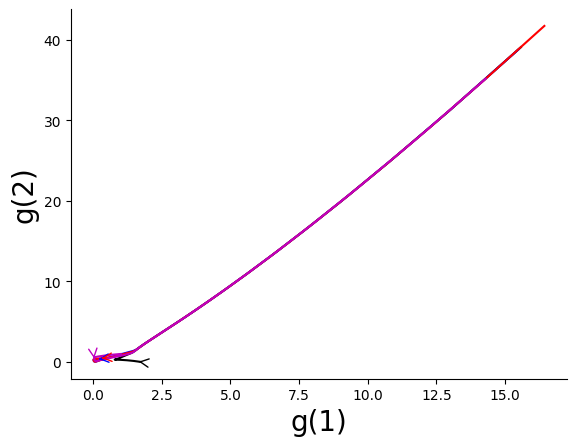

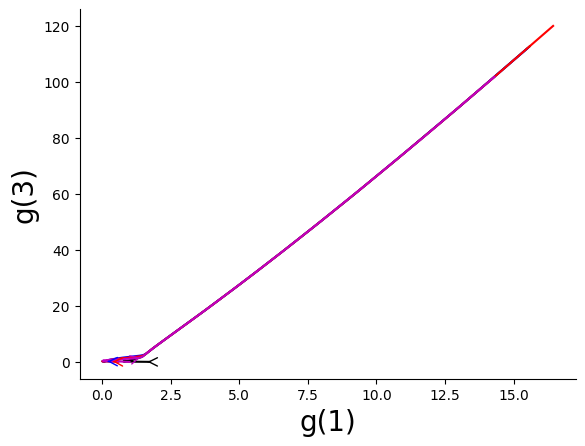

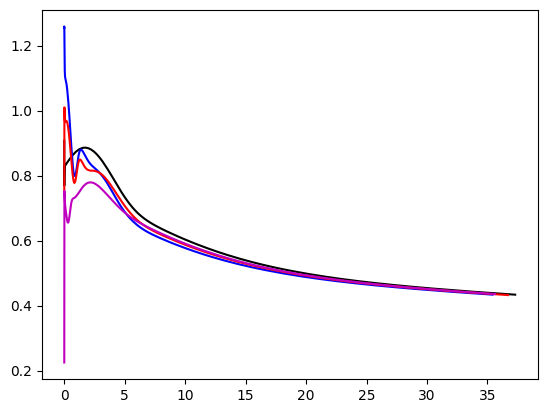

In [93]:
fig1, figN, fig_g2, fig_g3, _ = make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)


In [95]:
traj_dics = get_traj_plot_input(params, initial_points=initial_points)

/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Simulations/../Functions/group_w_pop_funs.py:372: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates


In [109]:
traj_dic1.keys()

dict_keys(['T', 'N1', 'N2', 'p', 'g', 'mean_x', 'var'])

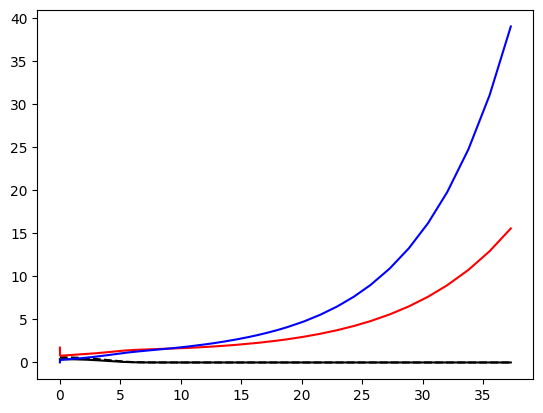

In [113]:
traj_dic1 = traj_dics[0]
traj_dic1['N1'][-100]
plt.plot(traj_dic1['T'], traj_dic1['N1'],'k')
plt.plot(traj_dic1['T'], traj_dic1['N2'],'--k')
plt.plot(traj_dic1['T'], traj_dic1['g'][0], 'r')
plt.plot(traj_dic1['T'], traj_dic1['g'][1], 'b')

# Scale = 6, A1 = 1.4

In [43]:
H = 1
x_max = 5
scale = 6
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 1.4, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True, scale = 6)
params = update_params(param_key = "scale", param=scale, params_base=params_base)


In [44]:
start_inds = [[70,50,55,115], # plot 1; black, blue, red, magenta
              [80,55,50,102], # plot 2
              [10,3,10,75],
              [10,3,8,143]]

In [45]:

perturbed_pt = [0.4, 0.2, 1,1,1e-4,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params, p_upper = 2)
initial_points = np.vstack((initial_points,perturbed_pt))

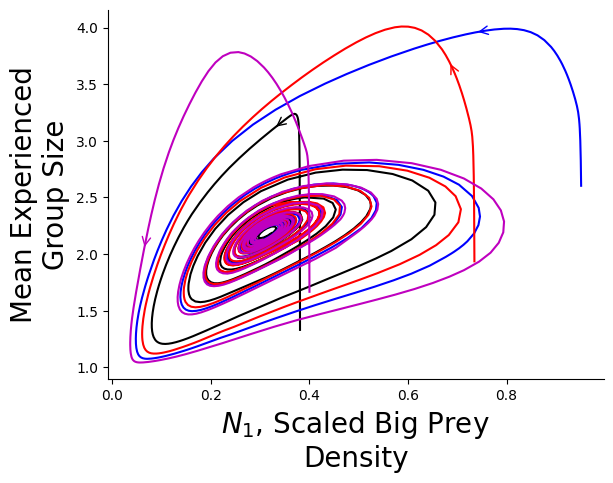

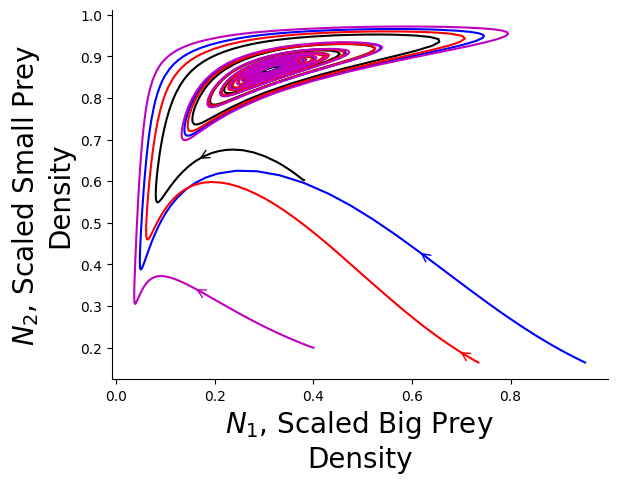

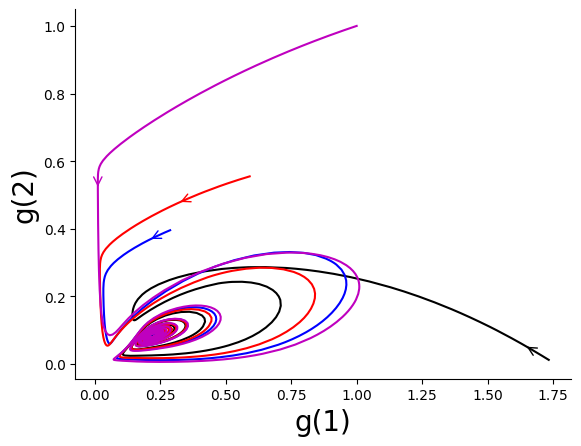

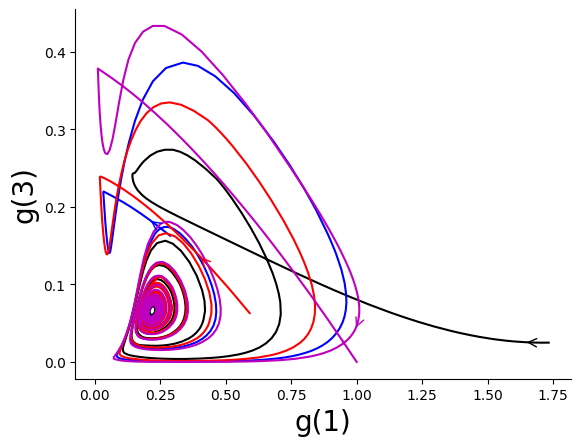

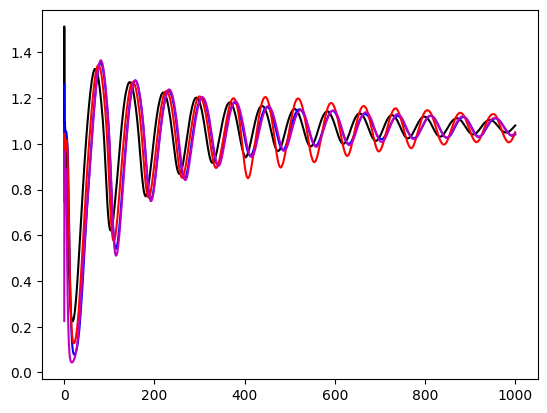

In [48]:
fig1, figN, fig_g2, fig_g3, _ = make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)


In [51]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_A1_1_4.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

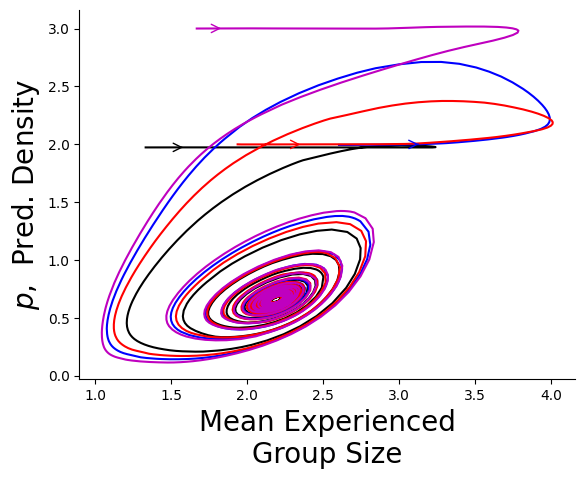

In [47]:
fig, ax = plt.subplots(1,1)
start_inds_p = [20,10,10,40]
for i, dic in enumerate(traj_dic_list):
    sim.plot_with_arrow(ax, dic['mean_x'], dic['p'],i,label = f'Initial Point {i}', start_ind = start_inds_p[i])
sim.format_ax(ax, xlab = sim.mean_x_lab, ylab = sim.standard_labs['p'])

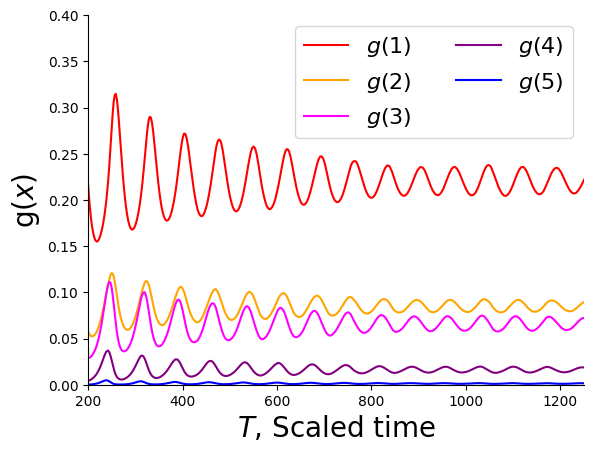

In [42]:
traj_dic1 = traj_dic_list[1]
traj_dic1.keys()
fig, ax = plt.subplots(1,1)
labels = [r'$g(1)$',r'$g(2)$',r'$g(3)$',r'$g(4)$', r'$g(5)$']
for i in range(0,5):
    ax.plot(traj_dic1['T'], traj_dic1['g'][i], c = sim.colors[i], label = labels[i])
ax.set_xlim([200,1250])
ax.set_ylim([0,0.4])
sim.format_ax(ax, xlab = Tlab, ylab = sim.gxlab, if_legend = True, ncol_legend=2)

# RETIRED: Type 2, Large Big Prey Growth Rate ($\eta_1 = 0.4$)
where $\beta_1/\beta_2 = H_1/H_2 = 8$


In [6]:
params_base['H2'] = 1
params = bif.update_params("scale", 8, params_base)
params['η1']= 0.4
start_inds = [[80,50,50,40],
              [65,55,50,[110,150]],
              [10,3,10,40],
              [10,2,10,50]]

In [7]:
perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

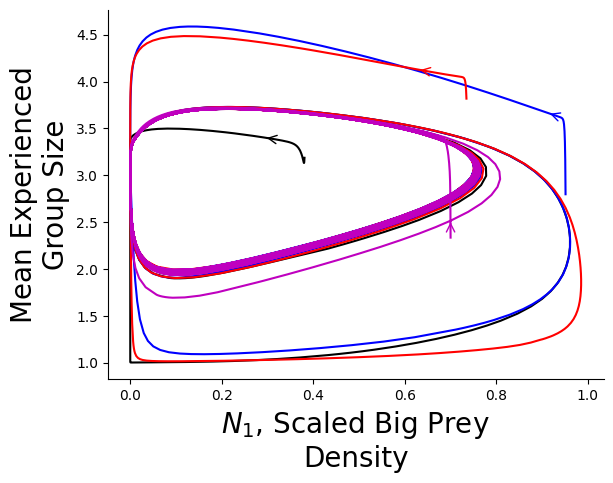

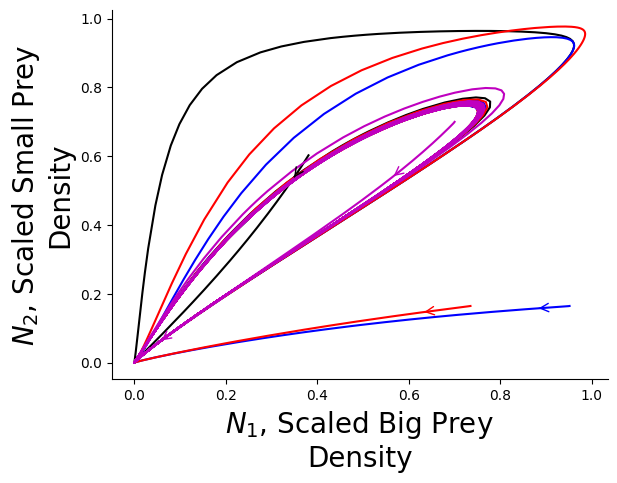

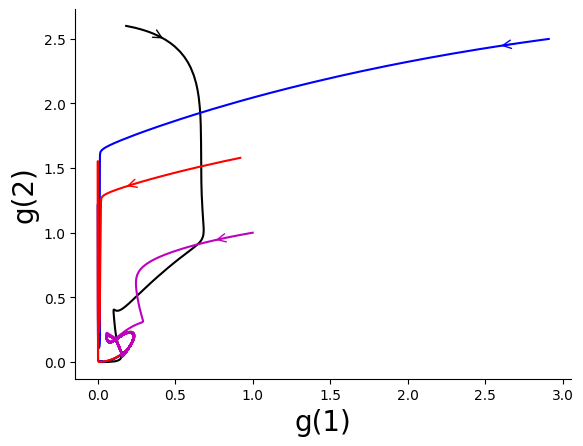

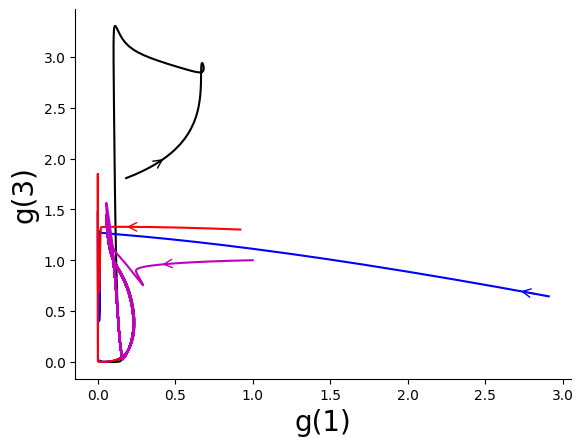

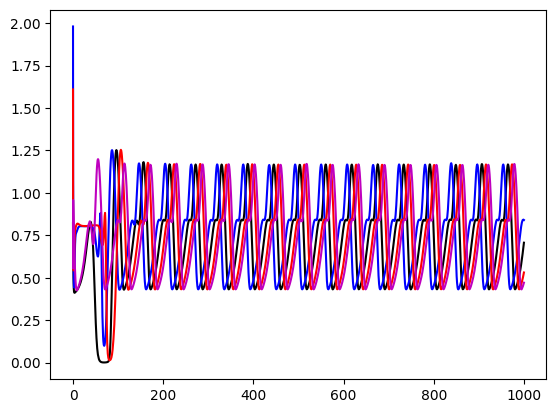

In [41]:
fig1, figN, fig_g2, fig_g3, _ = sim.make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

In [42]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_eta1_4.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [14]:
out = sim.get_traj_plot_input(params, t_f = 1000, initial_points = initial_points)


NameError: name 'lat_traj' is not defined

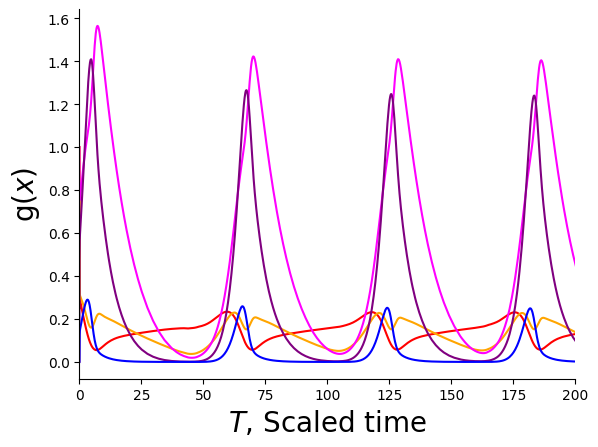

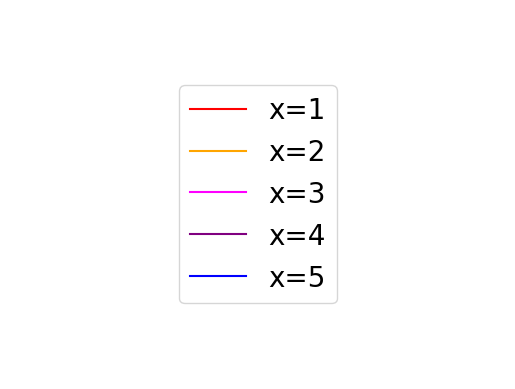

In [37]:
last_traj = out[-1]
T = last_traj['T']
gmat = last_traj['g']
for x in range(1,6):
    plt.plot(T,gmat[x-1], c=sim.colors[x-1], label = f'x={x}')

fig_g = plt.gcf()
ax1 = plt.gca()
sim.format_ax(ax = ax1, xlab = sim.Tlab, ylab = sim.gxlab, xlim = [0,200], if_legend = True)

# get legend object
legend_obj = ax1.get_legend()
# Extract handles and labels correctly
handles = legend_obj.get_lines()  # Correct way to get legend handles
labels = [text.get_text() for text in legend_obj.get_texts()]  # Get legend text



# Remove legend from fig1
legend_obj.remove()

# put legend in separate figure
figlegend, axlegend = plt.subplots()
axlegend.axis('off') 
axlegend.legend(handles, labels, loc="center", fontsize = 20)




In [39]:
fn_base = "_type2_eta1_4.eps"
fig_g.savefig(bif_sim_fig_path + 'gx_vs_T' + fn_base, 
              **sim.figure_ops)

In [40]:
figlegend.savefig(bif_sim_fig_path + 'gx_legend' + fn_base, 
                  **sim.figure_ops)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
